# **(Healthcare Insurance Cost Analysis Assessment)**

## Objectives

* The objective of this notebook is to visually represent the data I cleaned from a raw data set, focusing on different aspects of insurance charges. Finally displaying the factors that will increase or decrease insurance charges.

## Inputs

* #the inputs needed for this file include:
    - A cleaned DataFrame `df` containing the insurance data.
    - Libraries such as `pandas`, `numpy`, `seaborn`, `plotly.express` and `matplotlib` for data manipulation and visualization.
    




## Outputs

* The outputs of this notebook include:
    - Visualizations such as scatter plots, bar charts, and heatmaps that illustrate relationships between features and insurance charges.
    - A table summarizing representative profiles based on insurance charges, highlighting the lowest, median, and highest charges along with associated demographic factors.

## Additional Comments

* - All visualizations are designed with accessibility in mind, using clear labels, consistent color palettes, and annotations to highlight key insights.
- Charts are validated against the cleaned dataset (df) to ensure accuracy and reproducibility.
- Visuals are intended to support both technical and non-technical audiences, with interactive elements for deeper exploration.
- Future improvements could include dashboard integration or automated chart generation for new datasets.
-During the final phase of this project, I used an external AI assistant to generate preliminary insights. However, upon manual review and validation, I discovered inaccuracies in the output. This highlighted the importance of not relying solely on automated tools and always verifying results through reproducible checks and domain knowledge.
Going forward, I’ve implemented stricter validation steps and encourage others to critically assess AI-generated outputs—especially in sensitive domains like health insurance data. Automation can accelerate workflows, but human oversight remains essential for accuracy and ethical responsibility.





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [487]:
import os
current_dir = os.getcwd()
current_dir

'c:\\'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [488]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [489]:
current_dir = os.getcwd()
current_dir

'c:\\'

# Section 1

Section 1 content

In [490]:
# Here will import our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


---

# Section 2

Section 2 content

In [491]:
#load clean data from Cleaned_data
df = pd.read_csv('C:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\archive\\cleaned_dataset.csv')

In [492]:
#Checking data has loaded
df.head()

,age,sex,bmi,children,smoker,region,charges,is_bmi_outlier,bmi_category,age_category
0,19,female,27.90,0,yes,southwest,16884.92,False,Overweight,18-24
1,18,male,33.77,1,no,southeast,1725.55,False,Obese,18-24
2,28,male,33.00,3,no,southeast,4449.46,False,Obese,25-34
3,33,male,22.70,0,no,northwest,21984.47,False,Normal,25-34
4,32,male,28.88,0,no,northwest,3866.86,False,Overweight,25-34


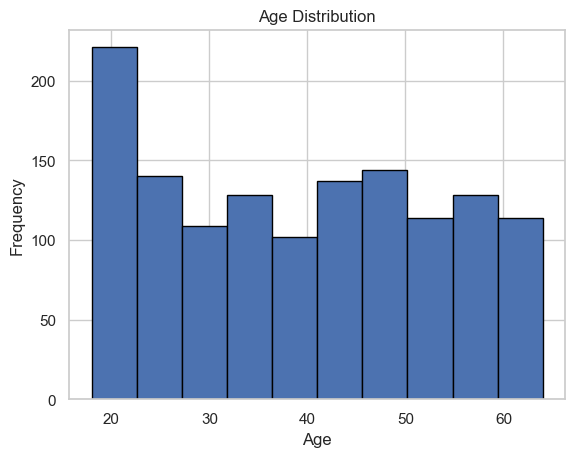

In [493]:
# Here we will display basic chart information of the dataset and get more detailed as we go

plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


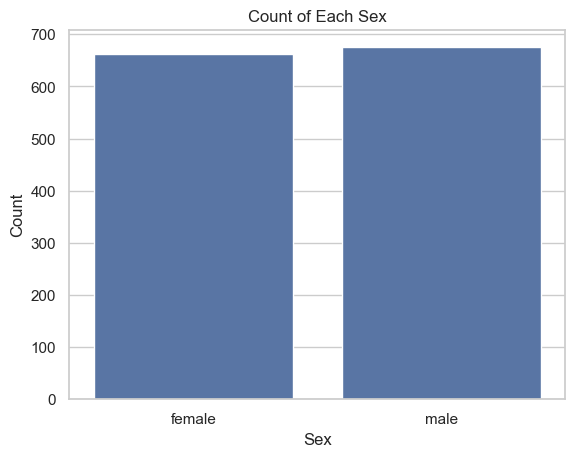

In [494]:
sns.countplot(x='sex', data=df)
plt.title('Count of Each Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

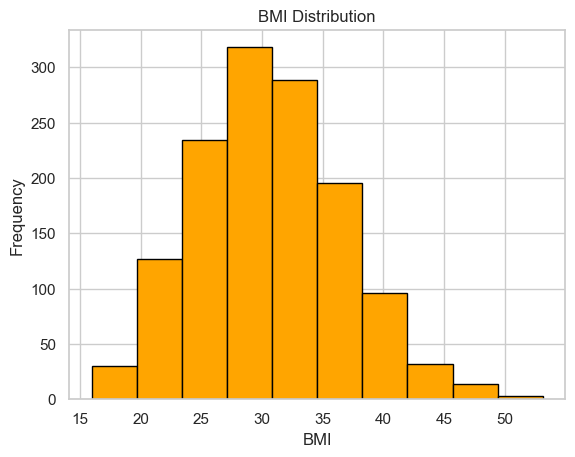

In [495]:
plt.hist(df['bmi'], bins=10, edgecolor='black', color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


---

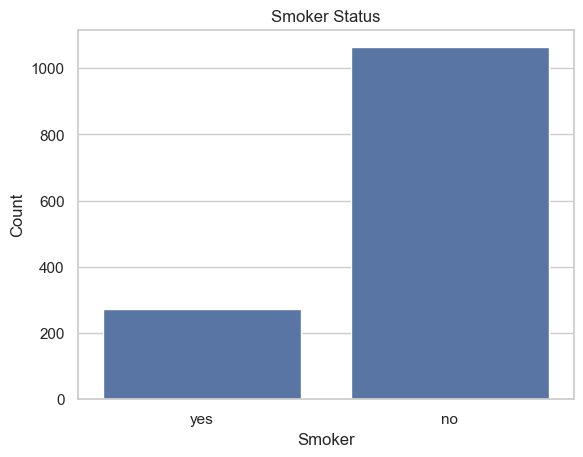

In [496]:
sns.countplot(x='smoker', data=df)
plt.title('Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


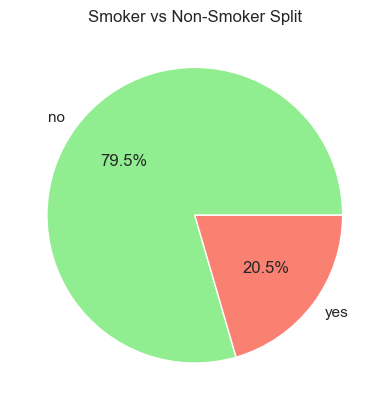

In [497]:

# Pie chart of smoker vs non-smoker counts
counts = df['smoker'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['lightgreen','salmon'])
plt.title('Smoker vs Non-Smoker Split')
plt.show()

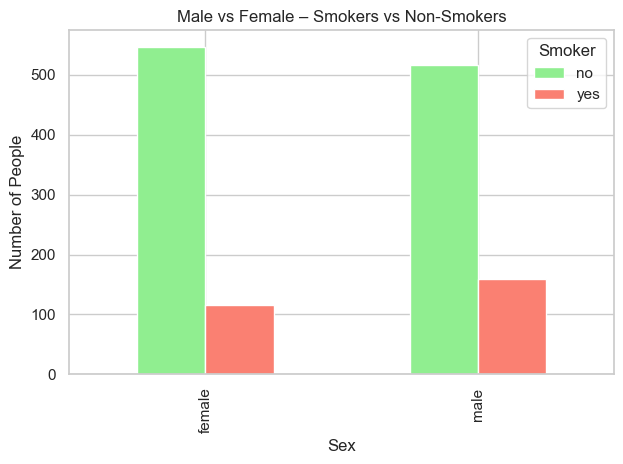

In [498]:
group_counts = df.groupby(['sex','smoker'], observed=True).size().unstack(fill_value=0)

# plot
group_counts.plot(kind='bar', color=['lightgreen','salmon'])
plt.title('Male vs Female – Smokers vs Non-Smokers')
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

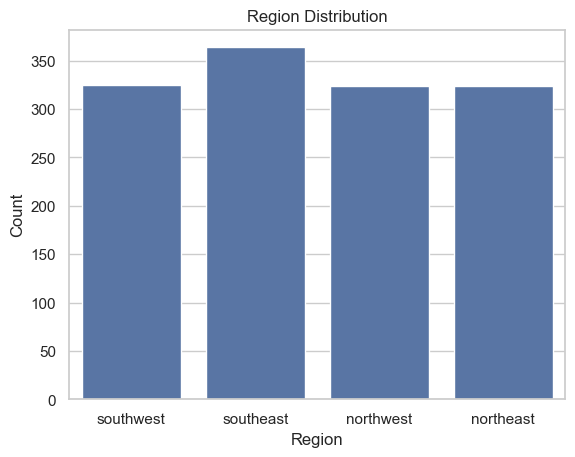

In [499]:
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


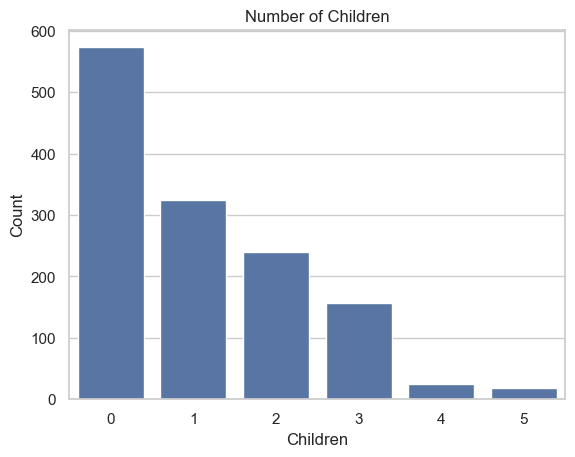

In [500]:
sns.countplot(x='children', data=df)
plt.title('Number of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()


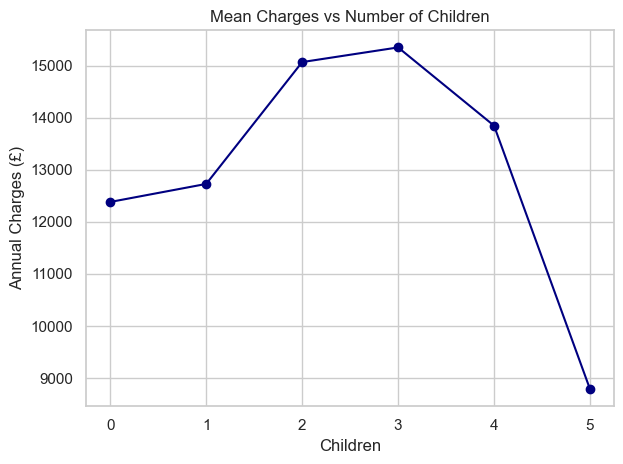

In [501]:
mean_children = df.groupby('children')['charges'].mean()
plt.plot(mean_children.index, mean_children.values, marker='o', color='navy')
plt.title('Mean Charges vs Number of Children')
plt.xlabel('Children')
plt.ylabel('Annual Charges (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

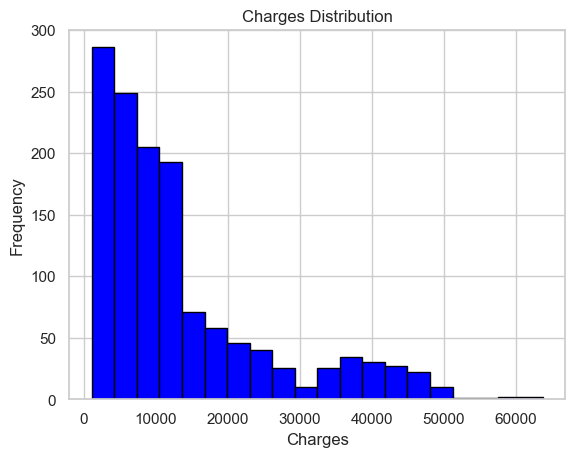

In [502]:
plt.hist(df['charges'], bins=20, edgecolor='black', color='blue')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()



=== Numerical Variables Analysis ===
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663628     1.095737  13279.121503
std      14.044333     6.100233     1.205571  12110.359677
min      18.000000    15.960000     0.000000   1121.870000
25%      27.000000    26.290000     0.000000   4746.340000
50%      39.000000    30.400000     1.000000   9386.160000
75%      51.000000    34.700000     2.000000  16657.720000
max      64.000000    53.130000     5.000000  63770.430000


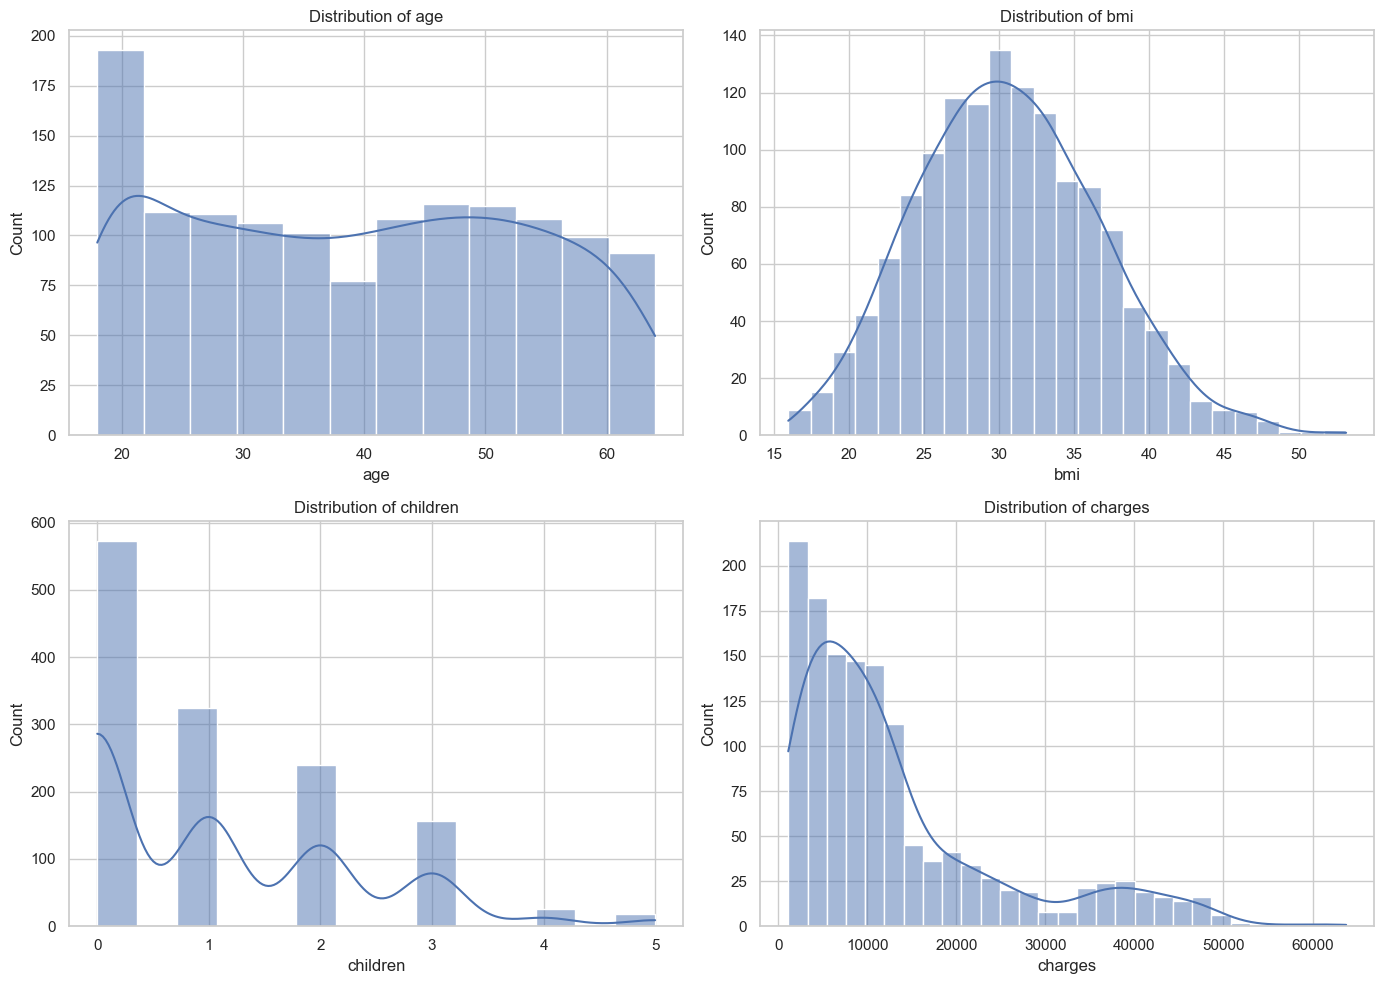

In [503]:
num_cols = ['age', 'bmi', 'children', 'charges']
print("\n=== Numerical Variables Analysis ===")
print(df[num_cols].describe())


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [504]:
#recalling the data 
df = pd.read_csv('C:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\archive\\cleaned_dataset.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges,is_bmi_outlier,bmi_category,age_category
0,19,female,27.90,0,yes,southwest,16884.92,False,Overweight,18-24
1,18,male,33.77,1,no,southeast,1725.55,False,Obese,18-24
2,28,male,33.00,3,no,southeast,4449.46,False,Obese,25-34
3,33,male,22.70,0,no,northwest,21984.47,False,Normal,25-34
4,32,male,28.88,0,no,northwest,3866.86,False,Overweight,25-34


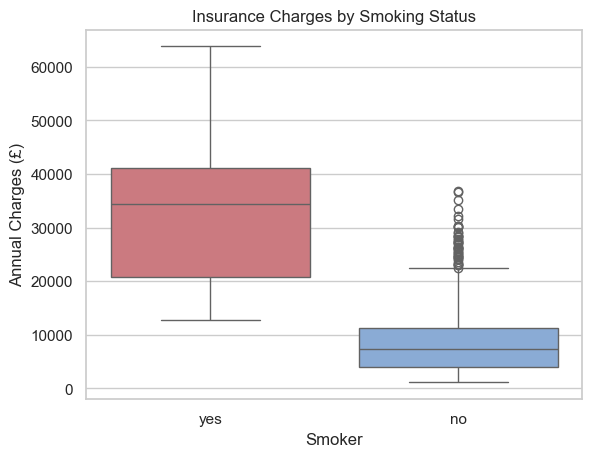

In [505]:
#This boxplot visualises the distribution of insurance charges based on smoking status.
#Smokers tend to have higher charges compared to non-smokers.
sns.boxplot(x='smoker', y='charges', hue='smoker', data=df, palette=['#d96c75', '#7ea9e1'])
plt.title("Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Annual Charges (£)")
plt.show()

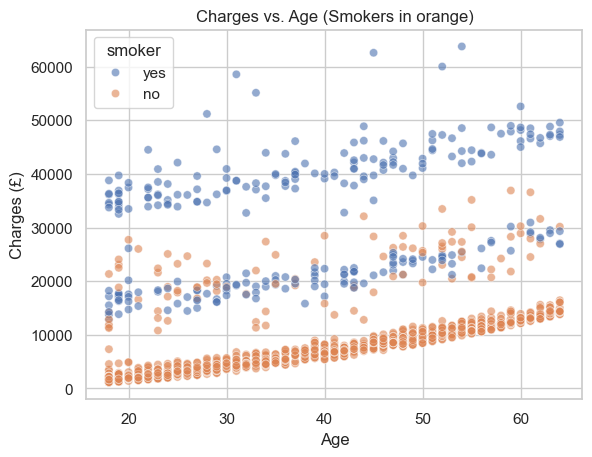

In [506]:
#This scatter plot visualises the relationship between cost of insurance, against age of smokers and non-smokers.
#We can see cost for non-smokers is more uniform compared to smokers, so we will continue to find a correlation to find a suitable correlation for smokers.
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title("Charges vs. Age (Smokers in orange)")
plt.xlabel("Age")
plt.ylabel("Charges (£)")
plt.show()


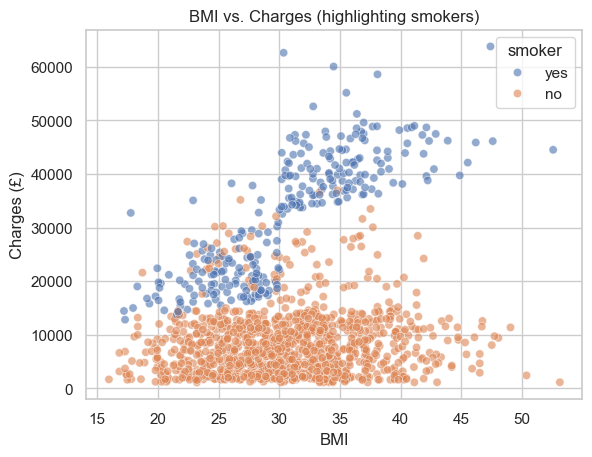

In [507]:
#From the chart below we can see that as BMI increases, the charges also tend to increase, with smokers generally having higher charges than non-smokers.

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title("BMI vs. Charges (highlighting smokers)")
plt.xlabel("BMI")
plt.ylabel("Charges (£)")
plt.show()


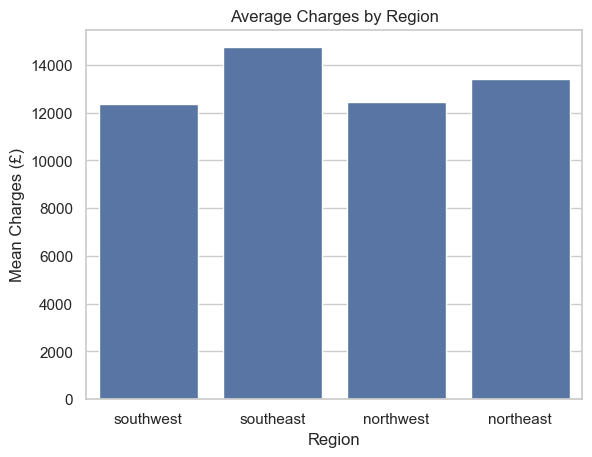

In [508]:
sns.barplot(x='region', y='charges', data=df, errorbar=None)
plt.title("Average Charges by Region")
plt.xlabel("Region")
plt.ylabel("Mean Charges (£)")
plt.show()



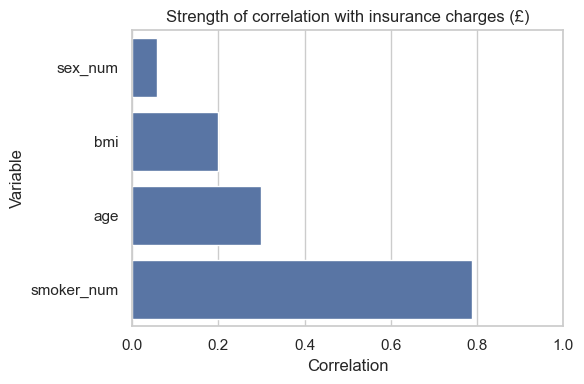

In [509]:
# This chart shows the strength of correlation between various features and insurance charges.
# We can see that smokers and age have a strong positive correlation with higher charges, while sex has a weak correlation.


df['sex_num'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker_num'] = df['smoker'].map({'yes': 1, 'no': 0})

corr_values = (
    df[['age', 'bmi', 'sex_num', 'smoker_num', 'charges']]
    .corr()['charges']
    .drop('charges')
    .abs()
    .sort_values()
)

corr_df = corr_values.reset_index()
corr_df.columns = ['Variable', 'Correlation']

plt.figure(figsize=(6, 4))
sns.barplot(data=corr_df, x='Correlation', y='Variable', color='#4c72b0') 
plt.title("Strength of correlation with insurance charges (£)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()



In [510]:
# Here I will load the dataset and create a summary of key factors affecting insurance charges

df = pd.read_csv('C:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\archive\\cleaned_dataset.csv')

# Group by key factors
summary = (
    df.groupby(['age', 'sex', 'bmi', 'smoker'])['charges']
      .agg(['max', 'min', 'median'])
      .reset_index()
)



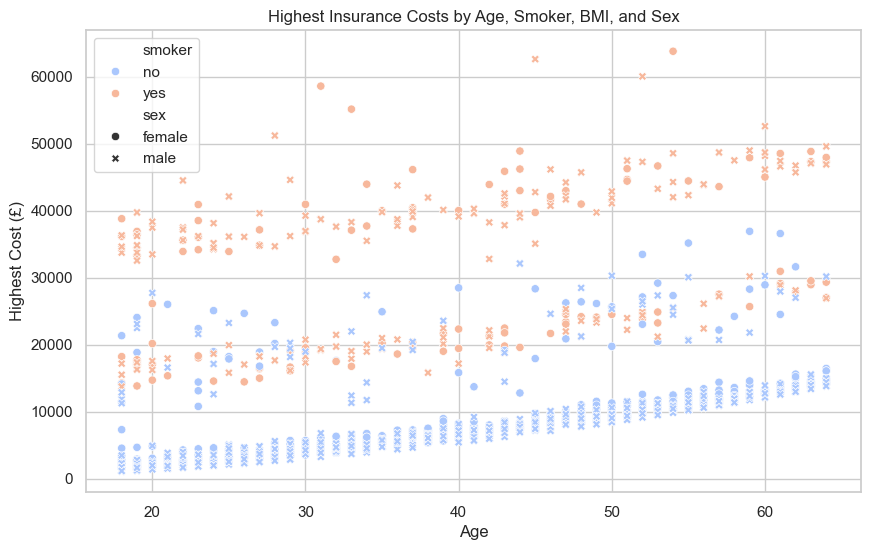

In [511]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=summary,
    x='age', y='max',
    hue='smoker', style='sex',
    palette='coolwarm'
)
plt.title("Highest Insurance Costs by Age, Smoker, BMI, and Sex")
plt.ylabel("Highest Cost (£)")
plt.xlabel("Age")
plt.show()


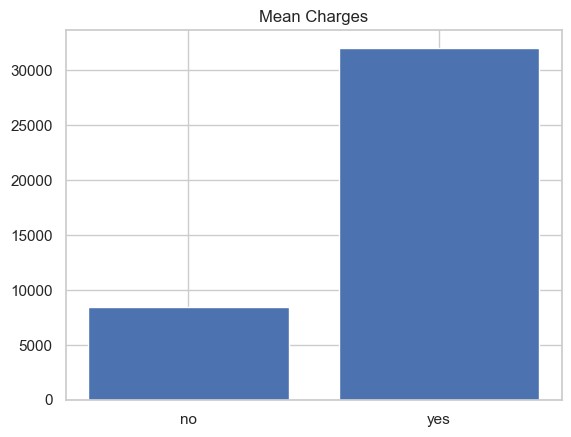

In [512]:
avg = df.groupby('smoker')['charges'].mean()
plt.bar(avg.index, avg.values)
plt.title('Mean Charges')
plt.show()

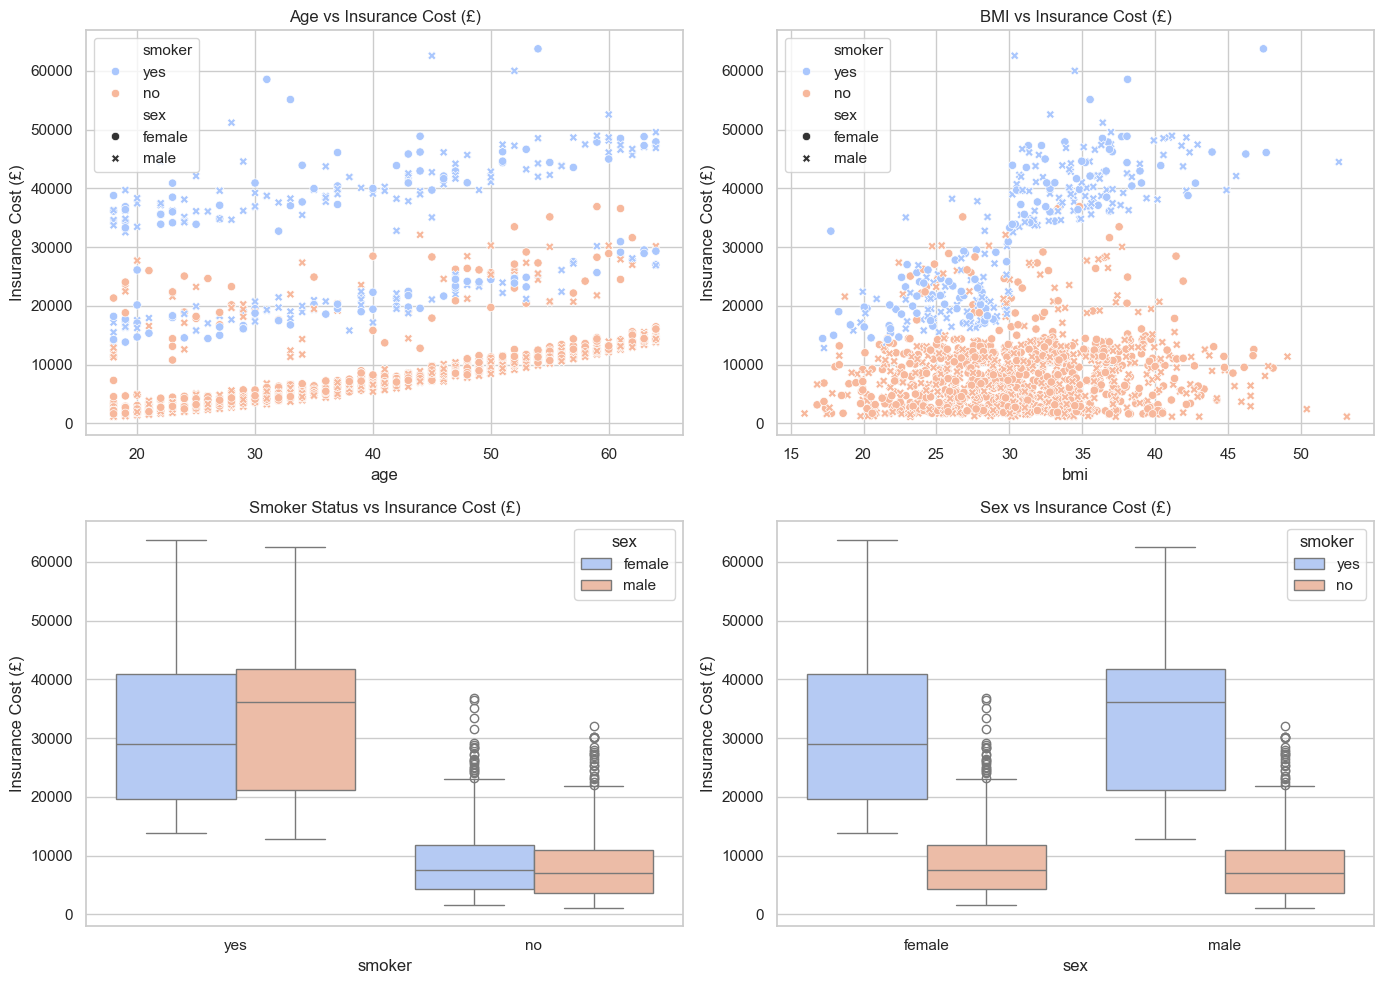

In [513]:
#For these charts i used AI to help represent the data visually
#As a result, we can see clear patterns and relationships between the variables.
#We can see that the lowest insurance costs are associated with Male, Non-smokers, who are younger with a low BMI
#The Higher costs are associated with Female, Smokers, who are older with a high BMI.

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.set_style("whitegrid")

# Age vs Charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', style='sex',
                palette='coolwarm', ax=axes[0,0])
axes[0,0].set_title("Age vs Insurance Cost (£)")

# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', style='sex',
                palette='coolwarm', ax=axes[0,1])
axes[0,1].set_title("BMI vs Insurance Cost (£)")

# Smoker vs Charges
sns.boxplot(data=df, x='smoker', y='charges', hue='sex',
            palette='coolwarm', ax=axes[1,0])
axes[1,0].set_title("Smoker Status vs Insurance Cost (£)")

# Sex vs Charges
sns.boxplot(data=df, x='sex', y='charges', hue='smoker',
            palette='coolwarm', ax=axes[1,1])
axes[1,1].set_title("Sex vs Insurance Cost (£)")

# Adjust layout
for ax in axes.flat:
    ax.set_ylabel("Insurance Cost (£)")
plt.tight_layout()
plt.show()


In [514]:
# From our conclusion we can see that the lowest insurance costs are associated with Male, Non-smokers, who are younger with a low BMI, living in the southeast.
# The Higher costs are associated with Female, Smokers, who are older with a high BMI, living in the southeast.
# This suggests that both gender and lifestyle factors (like smoking) play a significant role in determining insurance costs. While location and children also contributes, it appears to be less significant than the other factors.

def get_representative_profiles(df, y='charges', factors=None):
    if factors is None:
        # Commonly useful factors to show
        factors = ['sex', 'smoker', 'children', 'bmi', 'region']

    # Drop missing charges
    base = df.dropna(subset=[y]).copy()

    # Lowest
    lowest = base.loc[base[y].idxmin()].to_frame().T
    lowest['cost_stat'] = 'Lowest cost'

    # Highest
    highest = base.loc[base[y].idxmax()].to_frame().T
    highest['cost_stat'] = 'Highest cost'

    # Median: find closest to overall median
    med_val = base[y].median()
    median_row = base.iloc[(base[y] - med_val).abs().argsort()[:1]].copy()
    median_row['cost_stat'] = 'Median cost'

    # Combine and select only factors + cost
    profiles = pd.concat([lowest, median_row, highest], ignore_index=True)
    return profiles[['cost_stat', y] + factors]


factors_to_show = ['sex', 'smoker', 'children', 'bmi', 'region']
profiles_table = get_representative_profiles(df, y='charges', factors=factors_to_show)


print(profiles_table.to_string(index=False))


   cost_stat   charges    sex smoker children    bmi    region
 Lowest cost   1121.87   male     no        0  23.21 southeast
 Median cost   9386.16   male     no        1  35.97 southeast
Highest cost  63770.43 female    yes        0  47.41 southeast


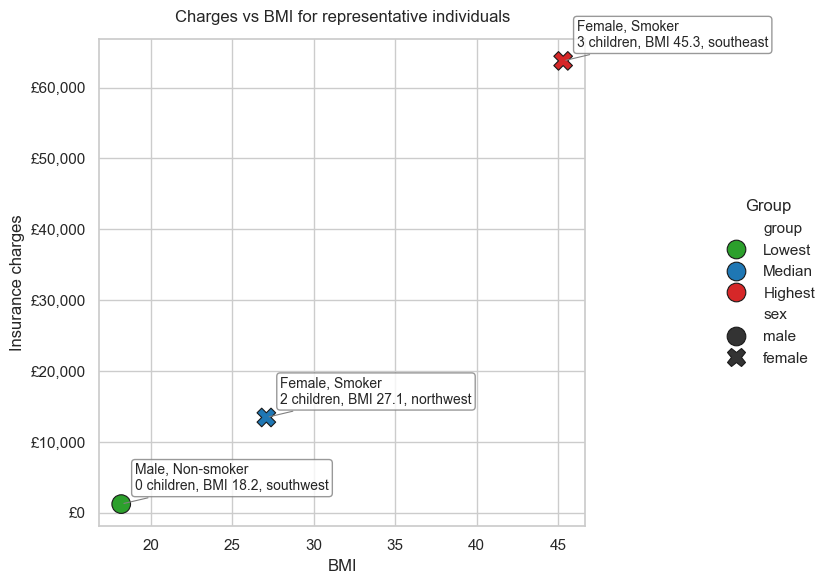

In [515]:
#I have used ai is visually represent the data of the lowest, median and highest insurence charge based on age, sex, bmi, smoker/non-smoker, children and location.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Example dataset — replace with your actual data
df = pd.DataFrame({
    'sex': ['male','female','female','male','female','male','female','male','male','female'],
    'smoker': ['no','yes','no','no','yes','no','no','yes','no','yes'],
    'children': [0,2,1,0,3,0,2,1,0,4],
    'bmi': [18.2, 27.1, 22.5, 19.8, 45.3, 21.0, 30.2, 28.5, 20.1, 35.0],
    'region': ['southwest','northwest','southeast','southwest','southeast','northwest','southwest','northeast','northwest','southeast'],
    'charges': [1234, 13456, 9800, 1500, 63770, 2100, 14500, 32000, 1800, 40000]
})

# Function to select lowest, median, and highest cost individuals
def select_representatives(df, y='charges'):
    base = df.dropna(subset=[y]).copy()
    lowest = base.loc[[base[y].idxmin()]].copy()
    lowest['group'] = 'Lowest'
    highest = base.loc[[base[y].idxmax()]].copy()
    highest['group'] = 'Highest'
    used = lowest.index.union(highest.index)
    remaining = base.loc[~base.index.isin(used)].copy()
    med_val = base[y].median()
    median = remaining.iloc[(remaining[y] - med_val).abs().argsort()[:1]].copy()
    median['group'] = 'Median'
    return pd.concat([lowest, median, highest], ignore_index=True)

# Select the three profiles
reps = select_representatives(df)

# Plot the annotated scatter
def plot_annotated_scatter(reps, y='charges'):
    plt.figure(figsize=(9, 6))
    ax = sns.scatterplot(
        data=reps, x='bmi', y=y,
        hue='group', style='sex',
        s=180, edgecolor='k', linewidth=0.8,
        palette={'Lowest':'#2ca02c', 'Median':'#1f77b4', 'Highest':'#d62728'}
    )

    # Add annotations for each point
    for _, row in reps.iterrows():
        label = f"{row['sex'].title()}, {'Non-smoker' if row['smoker'].lower()=='no' else 'Smoker'}\n" \
                f"{row['children']} children, BMI {row['bmi']:.1f}, {row['region']}"
        ax.annotate(
            label,
            xy=(row['bmi'], row[y]),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='gray', alpha=0.8),
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.8)
        )

    # Format y-axis as currency
    ax.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f'£{v:,.0f}'))

    # Titles and labels
    ax.set_title("Charges vs BMI for representative individuals", pad=12)
    ax.set_xlabel("BMI")
    ax.set_ylabel("Insurance charges")

    # Legend moved to far right
    ax.legend(
        title='Group',
        frameon=False,
        loc='center left',
        bbox_to_anchor=(1.25, 0.5)
    )

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_annotated_scatter(reps)

In [516]:
#recall cleaned data
df = pd.read_csv('C:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects\\archive\\cleaned_dataset.csv')

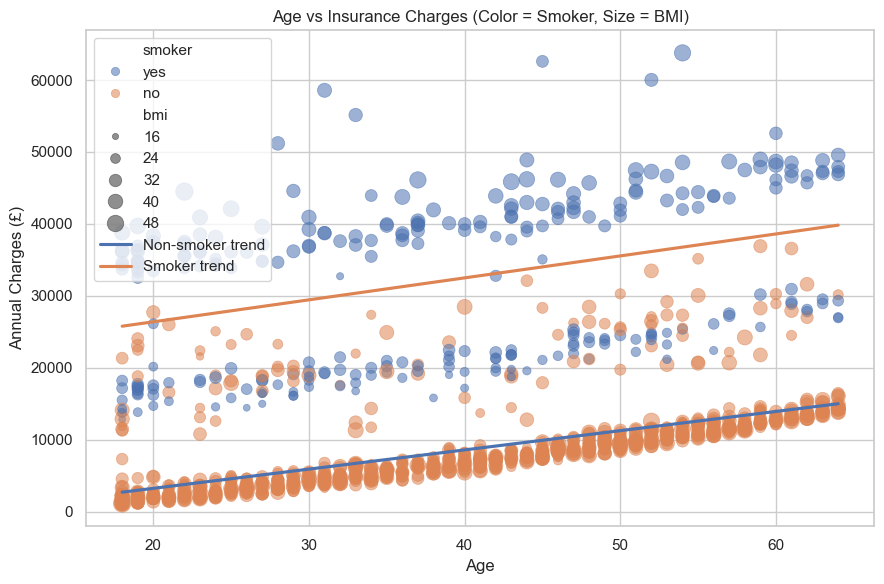

In [517]:
#Charges rise with age, and points with larger BMI (bigger markers) sit higher—especially among smokers—illustrating the combined effect.

sns.set_theme(style="whitegrid")

# Base scatter: color by smoker, size by BMI
plt.figure(figsize=(9,6))
scatter = sns.scatterplot(
    data=df, x="age", y="charges",
    hue="smoker", size="bmi", sizes=(20, 160),
    alpha=0.55, edgecolor=None
)

# Add separate regression lines for smokers/non-smokers
for group, label in [("no", "Non-smoker trend"), ("yes", "Smoker trend")]:
    subset = df[df["smoker"] == group]
    if len(subset) > 1:
        sns.regplot(
            data=subset, x="age", y="charges",
            scatter=False, ci=None, label=label
        )

plt.title("Age vs Insurance Charges (Color = Smoker, Size = BMI)", fontsize=12)
plt.xlabel("Age")
plt.ylabel("Annual Charges (£)")

# Combine legends (scatter hue/size + trend labels)
handles, labels = scatter.get_legend_handles_labels()
# De-duplicate legend entries
seen = {}
new_handles, new_labels = [], []
for h, l in zip(handles, labels):
    if l not in seen:
        new_handles.append(h); new_labels.append(l); seen[l] = True
plt.legend(new_handles, new_labels, title=None, frameon=True)

plt.tight_layout()
# Optional: save
# plt.savefig("chart2_age_vs_charges_smoker_bmi.png", dpi=150, bbox_inches="tight")
plt.show()


Our predictive analysis is focused on identifying key factors that influence insurance charges. By examining the relationships between various demographic and health-related features, we aim to uncover insights that can inform pricing strategies and risk assessments.

- women with higher BMI may face increased insurance costs
- women who smoke may also face higher premiums
- men who dont smoke may have lower insurance costs
- men with lower BMI may have lower insurance costs
- from our data we can also say that location and number of children provides inconclusive evidence regarding its impact on insurance costs.

---